# 2. Exploratory Data Analysis (EDA)

Total de imagens em healthy: 2104
Total de imagens em powdery_mildew: 2104


/tmp/ipykernel_11321/333741991.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classe', y='Quantidade', data=df_counts, palette='viridis')


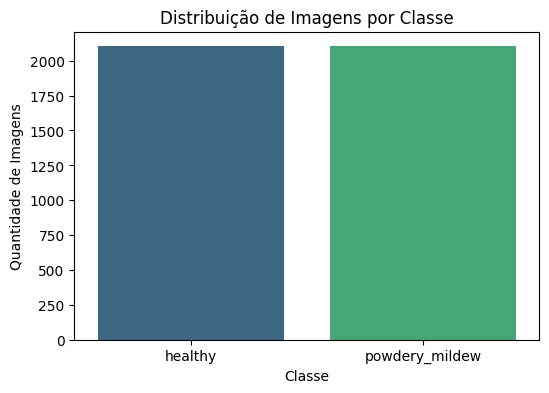

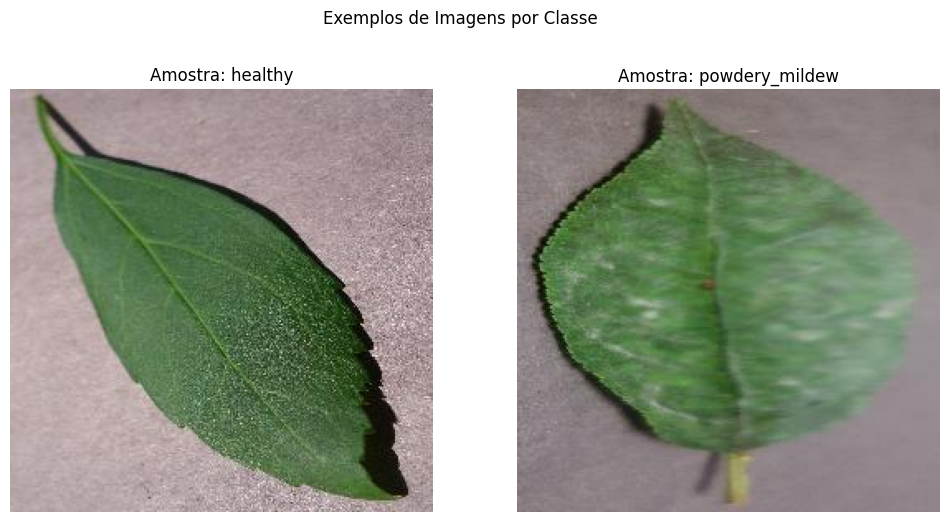

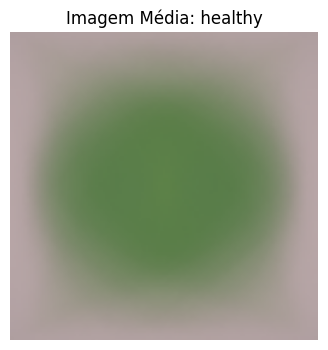

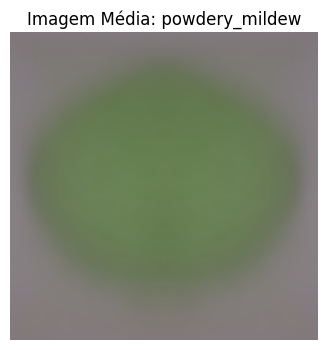

In [4]:
# Importando as bibliotecas necessárias
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Definindo o diretório base onde as imagens estão armazenadas
# Supondo que a estrutura seja: data/cherry_leaves/Healthy e data/cherry_leaves/Mildew
data_dir = "../cherry-leaves/"
classes = ['healthy', 'powdery_mildew']


# Contagem de imagens por classe
image_counts = {}
for cls in classes:
    folder = os.path.join(data_dir, cls)
    files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    image_counts[cls] = len(files)
    print(f"Total de imagens em {cls}: {len(files)}")

# Visualizando a distribuição de imagens por classe com um gráfico de barras
df_counts = pd.DataFrame(list(image_counts.items()), columns=['Classe', 'Quantidade'])
plt.figure(figsize=(6, 4))
sns.barplot(x='Classe', y='Quantidade', data=df_counts, palette='viridis')
plt.title("Distribuição de Imagens por Classe")
plt.xlabel("Classe")
plt.ylabel("Quantidade de Imagens")
plt.show()

# Visualização de uma amostra de imagens de cada classe
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, cls in enumerate(classes):
    folder = os.path.join(data_dir, cls)
    files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if files:
        sample_image_path = os.path.join(folder, files[0])
        image = cv2.imread(sample_image_path)
        # Converter de BGR (formato do OpenCV) para RGB para exibir corretamente com matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[i].imshow(image_rgb)
        axes[i].set_title(f"Amostra: {cls}")
        axes[i].axis('off')
plt.suptitle("Exemplos de Imagens por Classe")
plt.show()

# (Opcional) Calcular a imagem média para cada classe
for cls in classes:
    folder = os.path.join(data_dir, cls)
    files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    sum_image = None
    count = 0
    for f in files:
        image = cv2.imread(os.path.join(folder, f))
        image = cv2.resize(image, (128, 128))  # Ajuste o tamanho conforme necessário
        image = image.astype(np.float32)
        if sum_image is None:
            sum_image = image
        else:
            sum_image += image
        count += 1
    mean_image = (sum_image / count).astype(np.uint8)
    
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(mean_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Imagem Média: {cls}")
    plt.axis('off')
    plt.show()


# Exemplo: Visualização de uma imagem e cálculo da média dos pixels

In [2]:
import cv2

sample_image = cv2.imread(f"../data/cherry_leaves/{image_files[0]}")
sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.imshow(sample_image_rgb)
plt.title("Exemplo de Imagem de Folha de Cereja")
plt.axis("off")
plt.show()

NameError: name 'image_files' is not defined

# Tarefas adicionais:
# - Plotar distribuição do número de imagens por classe (saudável x míldio)
# - Criar montagens de imagens para visualização comparativa